In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting and visualozing data
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.autolayout"] = True

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/startup-logistic-regression/50_Startups.csv


In [2]:
df = pd.read_csv('/kaggle/input/startup-logistic-regression/50_Startups.csv')
print(df.shape)
df.head()

(50, 5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(50, 4) (50,)


### Resolving Dummy Variable

In [4]:
X = pd.get_dummies(X, drop_first=True)
X.head(10)

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0
5,131876.90,99814.71,362861.36,0,1
6,134615.46,147198.87,127716.82,0,0
7,130298.13,145530.06,323876.68,1,0
8,120542.52,148718.95,311613.29,0,1
9,123334.88,108679.17,304981.62,0,0


### Taking only 1 feature - **`R&D Spend`**

In [5]:
#Splitting testdata into X_train,X_test,y_train,y_test
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :1].values, y.values, test_size=.33, random_state=10)

In [6]:
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [7]:
y_train = y_train[X_train[:,0].argsort()]
X_train = X_train[X_train[:, 0].argsort()]

In [8]:
print("X_train shape:", X_train.shape, "; y_train shape:", y_train.shape, "\nX_test shape:", X_test.shape, "; y_test shape:", y_test.shape)

X_train shape: (33, 1) ; y_train shape: (33, 1) 
X_test shape: (17, 1) ; y_test shape: (17,)


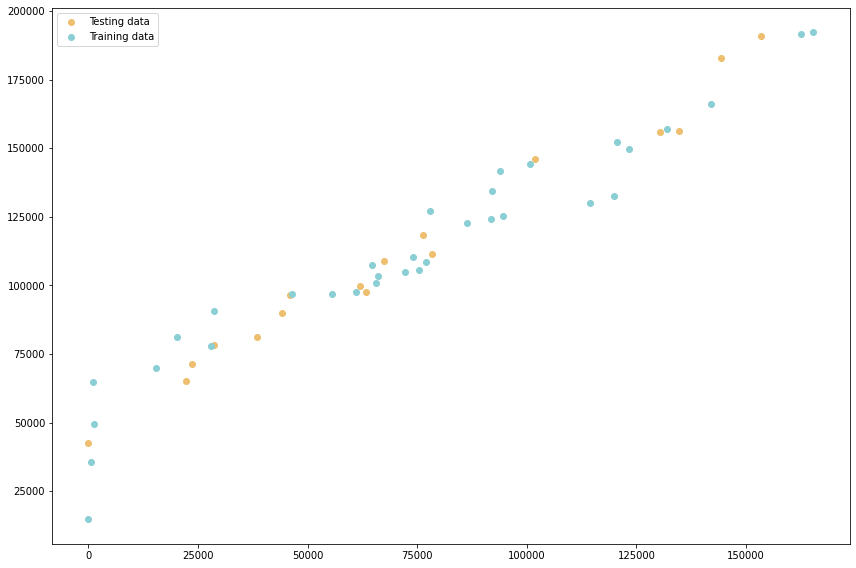

In [9]:
plt.scatter(X_test, y_test, c='#edbf6f', label='Testing data')
plt.scatter(X_train, y_train, c='#8acfd4', label='Training data')
plt.legend(loc="upper left")
plt.show()

In [10]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

In [11]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
print(poly_reg.score(X_poly, y_train))

0.9311474152478129


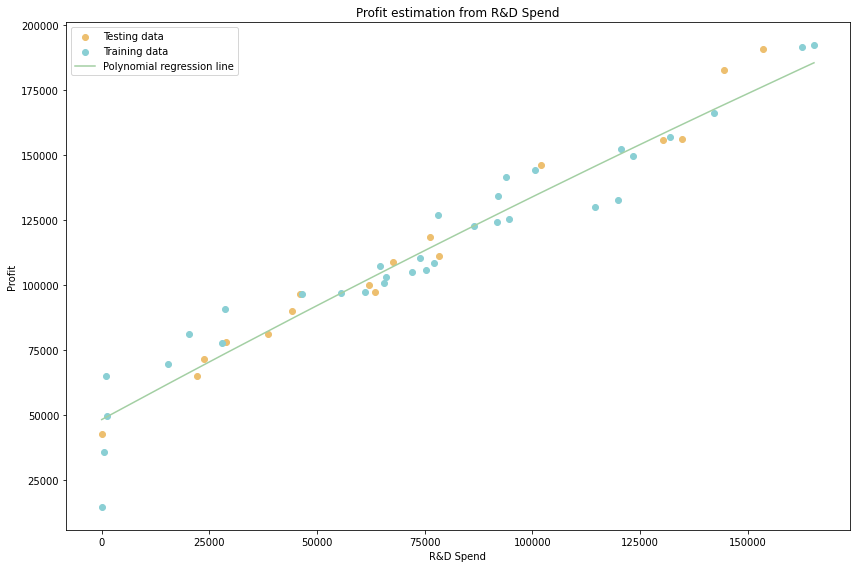

In [12]:
plt.title('Profit estimation from R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.scatter(X_test, y_test, c='#edbf6f', label='Testing data')
plt.scatter(X_train, y_train, c='#8acfd4', label='Training data')
plt.plot(X_train, poly_reg.predict(X_poly), c='#a3cfa3', label='Polynomial regression line')
plt.legend(loc="upper left")
plt.show()

In [13]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

In [14]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
print(poly_reg.score(X_poly, y_train))

0.9429100629025687


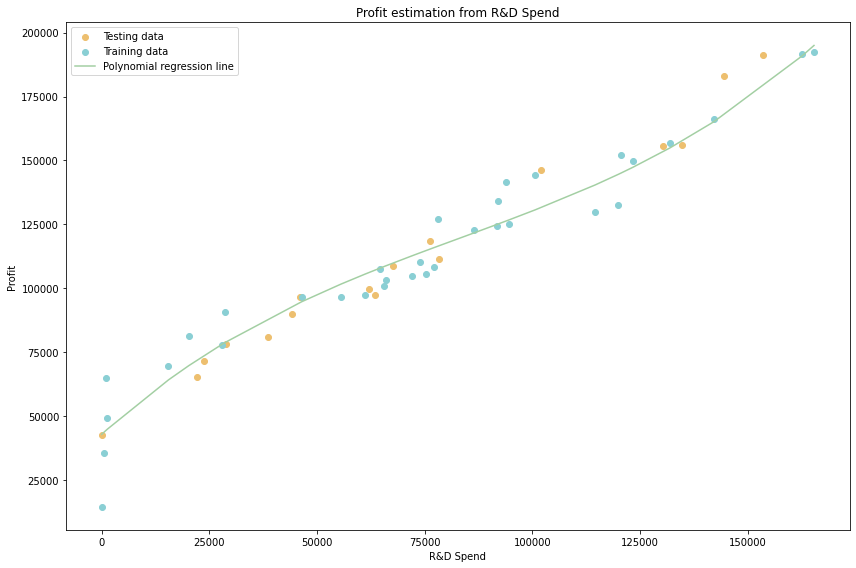

In [15]:
plt.title('Profit estimation from R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.scatter(X_test, y_test, c='#edbf6f', label='Testing data')
plt.scatter(X_train, y_train, c='#8acfd4', label='Training data')
plt.plot(X_train, poly_reg.predict(X_poly), c='#a3cfa3', label='Polynomial regression line')
plt.legend(loc="upper left")
plt.show()

#### For `n_feature = 1`: 
#### `Degree = 2` R² score of 0.931
#### `Degree = 3` R² score of 0.943

### Taking 2 features - **`R&D Spend`**	and **`Administration`**

In [16]:
#Splitting testdata into X_train,X_test,y_train,y_test
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :2].values, y.values, test_size=.33, random_state=10)

In [17]:
X_train = X_train.reshape(-1, 2)
y_train = y_train.reshape(-1, 1)

In [18]:
y_train = y_train[X_train[:, 0].argsort()]
X_train = X_train[X_train[:, 0:2].argsort()]

In [19]:
print("X_train shape:", X_train.shape, "; y_train shape:", y_train.shape, "\nX_test shape:", X_test.shape, "; y_test shape:", y_test.shape)

X_train shape: (33, 2, 2) ; y_train shape: (33, 1) 
X_test shape: (17, 2) ; y_test shape: (17,)


ValueError: shape mismatch: objects cannot be broadcast to a single shape

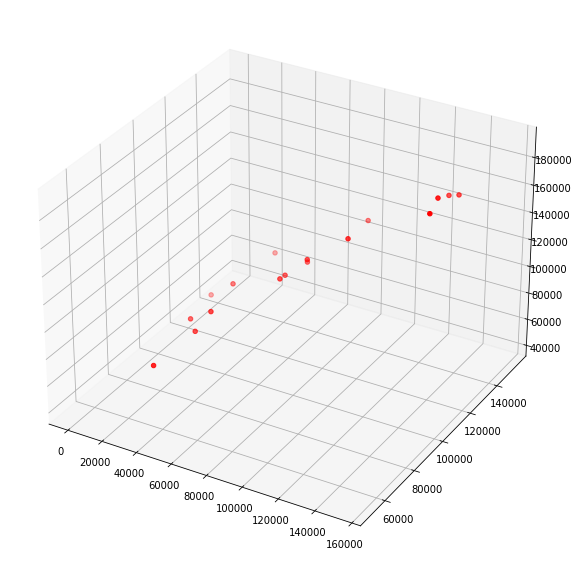

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='red', label='Testing data')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='green', label='Training data')
ax.legend(loc="upper left")
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

In [ ]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
print(poly_reg.score(X_poly, y_train))

In [ ]:
poly_reg.predict(X_poly).shape

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='green', label='Training data')
ax.scatter(X_train[:, 0], X_train[:, 1], poly_reg.predict(X_poly), c='red', label='Polynomial regression line')
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

In [ ]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
print(poly_reg.score(X_poly, y_train))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='green', label='Training data')
ax.scatter(X_train[:, 0], X_train[:, 1], poly_reg.predict(X_poly), c='red', label='Polynomial regression line')
plt.legend(loc="upper left")
plt.show()

### For `n_feature = 2`: 
#### `Degree = 2` R² score of 0.932
#### `Degree = 3` R² score of 0.953